In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

## Load data
First we need to load and concatenate the data.

In [2]:
# load in a loop
for i in range(100):
    if i == 0:
        # Do nothing
        a = 1
    elif i == 1:
        # use the first one to create the data frame
        motionData = pd.read_csv("Data/i_" + str(i) + ".csv")
    else:
        # Append subsequent ones
        tempData = pd.read_csv("Data/i_" + str(i) + ".csv")
        motionData = motionData.append([tempData], ignore_index=True)

Now all the data should be in there.

In [3]:
motionData.shape

(17657, 44)

In [4]:
motionData.head()

,loc,t,aDotE,bDotE,gDotE,aE,bE,gE,xE,yE,...,gUB,xUB,yUB,zUB,xHand,yHand,zHand,aHand,bHand,gHand
0,0,0.000000,-0.010606,0.005257,-0.014469,-1.467866,-4.499170,1.609397,-0.147782,1.183484,...,-0.197993,0.021643,1.581992,0.007781,-0.322869,1.178845,0.198740,278.0107,249.8943,359.342600
1,0,0.011111,-0.013810,0.007402,-0.017650,-1.467539,-4.498873,1.609570,-0.147960,1.183458,...,-0.198137,0.021540,1.582018,0.007814,-0.322881,1.178908,0.198735,277.9912,249.5753,359.663100
2,0,0.022222,-0.015932,0.009530,-0.015508,-1.467336,-4.498781,1.609810,-0.148008,1.183491,...,-0.198292,0.021579,1.582008,0.007829,-0.323000,1.179058,0.198812,277.9846,249.2006,0.021168
3,0,0.033333,-0.012713,0.011669,-0.009127,-1.466909,-4.498940,1.609869,-0.148035,1.183421,...,-0.198347,0.021458,1.582051,0.007832,-0.323041,1.179092,0.198840,277.9651,248.9871,0.211210
4,0,0.044444,-0.011643,0.011668,-0.008066,-1.466781,-4.498893,1.609960,-0.148069,1.183439,...,-0.198355,0.021475,1.582054,0.007837,-0.323122,1.179087,0.198855,277.9737,248.9277,0.238386


In [5]:
motionData.columns

Index(['loc', 't', 'aDotE', 'bDotE', 'gDotE', 'aE', 'bE', 'gE', 'xE', 'yE',
       'zE', 'aDotUA', 'bDotUA', 'gDotUA', 'aUA', 'bUA', 'gUA', 'xUA', 'yUA',
       'zUA', 'aDotSH', 'bDotSH', 'gDotSH', 'aSH', 'bSH', 'gSH', 'xSH', 'ySH',
       'zSH', 'aDotUB', 'bDotUB', 'gDotUB', 'aUB', 'bUB', 'gUB', 'xUB', 'yUB',
       'zUB', 'xHand', 'yHand', 'zHand', 'aHand', 'bHand', 'gHand'],
      dtype='object')

### Evaluate and visualise

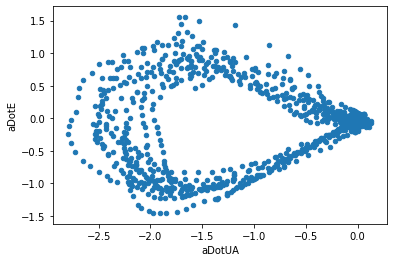

In [6]:
motionData[motionData['loc']==5].plot(x='aDotUA',y='aDotE',kind='scatter')

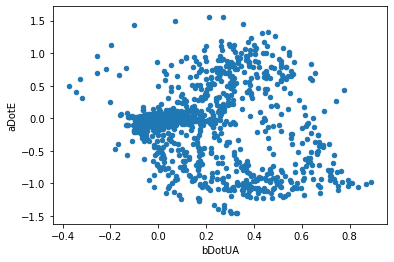

In [7]:
motionData[motionData['loc']==5].plot(x='bDotUA',y='aDotE',kind='scatter')

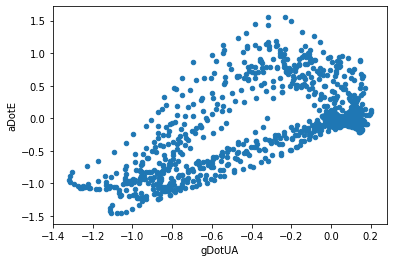

In [8]:
motionData[motionData['loc']==5].plot(x='gDotUA',y='aDotE',kind='scatter')

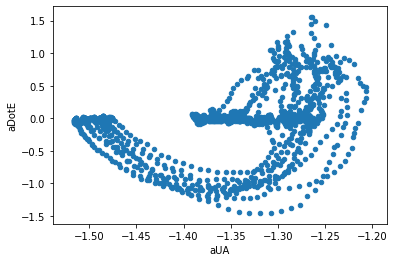

In [9]:
motionData[motionData['loc']==5].plot(x='aUA',y='aDotE',kind='scatter')

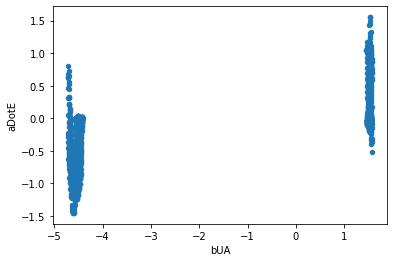

In [10]:
motionData[motionData['loc']==5].plot(x='bUA',y='aDotE',kind='scatter')

This data seems like needs to be corrected because of euler angles!

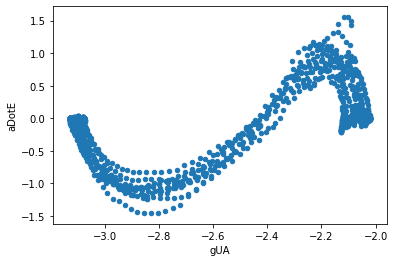

In [11]:
motionData[motionData['loc']==5].plot(x='gUA',y='aDotE',kind='scatter')

### Fix the bUA data

In [12]:
motionData.loc[motionData['bUA'] < -np.pi, 'bUA'] = motionData[motionData['bUA']<-np.pi] + (2*np.pi)

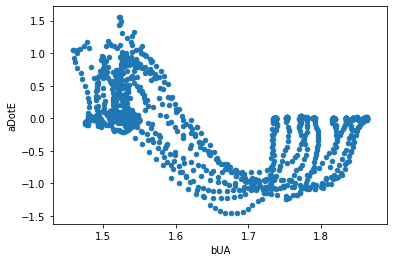

In [22]:
motionData[motionData['loc']==5].plot(x='bUA',y='aDotE',kind='scatter')

### Normalise data

## Select data

In [23]:
# Select the columns of interest
#X_data = motionData[['aUA','bUA','gUA']]
#y_data = motionData[['gE']]
#X_data = motionData[['aDotUA','bDotUA','gDotUA']]
#y_data = motionData[['aDotE']]
X_data = motionData[['aDotUA','bDotUA','gDotUA','aUA','bUA','gUA']]
y_data = motionData[['aDotE']]

Now let's check it

In [24]:
X_data.head()

,aDotUA,bDotUA,gDotUA,aUA,bUA,gUA
0,-0.012523,-0.010944,-0.007161,-1.429214,1.679913,-3.116697
1,-0.015719,-0.010956,-0.007132,-1.429097,1.680017,-3.116423
2,-0.015761,-0.010961,-0.011393,-1.428822,1.680130,-3.116272
3,-0.013643,-0.004563,-0.010361,-1.428694,1.679997,-3.116185
4,-0.013602,-0.004559,-0.006100,-1.428770,1.680051,-3.116044


In [25]:
y_data.head()

,aDotE
0,-0.010606
1,-0.013810
2,-0.015932
3,-0.012713
4,-0.011643


### Train-test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

## Linear regression

### Train model

In [27]:
from sklearn.linear_model import LinearRegression
linearEstimator = LinearRegression().fit(X_train,y_train)

In [28]:
# Get some info from it
print("estimator.coef_:", linearEstimator.coef_)
print("estimator.intercept_:", linearEstimator.intercept_)

estimator.coef_: [[-0.19298439  0.54648221  1.75438618 -0.09117813 -0.11144668 -0.01344379]]
estimator.intercept_: [0.06063441]


### Evaluate

In [29]:
print("Training set score: {:.2f}".format(linearEstimator.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linearEstimator.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.71


## K neighbours regression

### Train

In [30]:
from sklearn.neighbors import KNeighborsRegressor
kEstimator = KNeighborsRegressor(n_neighbors=4)
kEstimator.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

### Evaluate

In [31]:
print("Train set R^2: {:.2f}".format(kEstimator.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(kEstimator.score(X_test, y_test)))

Train set R^2: 0.97
Test set R^2: 0.95


## SVM

### Train

In [38]:
from sklearn.svm import SVR
# Create three different models using different kernels
svr_rbf = SVR(kernel='rbf',C=100,gamma='scale')
svr_lin = SVR(kernel='linear',C=100,gamma='scale')
svr_poly = SVR(kernel='poly',C=100,gamma='scale')
# Fit to the training data
svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
svr_poly.fit(X_train,y_train)

C:\Users\ricardog\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ricardog\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ricardog\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
print("RBF Train set R^2: {:.2f}".format(svr_rbf.score(X_train, y_train)))
print("RBF Test set R^2: {:.2f}".format(svr_rbf.score(X_test, y_test)))
print("LIN Train set R^2: {:.2f}".format(svr_lin.score(X_train, y_train)))
print("LIN Test set R^2: {:.2f}".format(svr_lin.score(X_test, y_test)))
print("POLY Train set R^2: {:.2f}".format(svr_poly.score(X_train, y_train)))
print("POLY Test set R^2: {:.2f}".format(svr_poly.score(X_test, y_test)))

RBF Train set R^2: 0.88
RBF Test set R^2: 0.89
LIN Train set R^2: 0.69
LIN Test set R^2: 0.70
POLY Train set R^2: 0.87
POLY Test set R^2: 0.87
